##Cursos MAI5024/SCC5848 - INTRODUÇÃO A CIENCIA DE DADOS
##Profa. Roseli Ap. Francelin Romero
##**Exercício 02 - Entrega 13 de abril de 2023** 
## Transformação nos dados e Seleção de variáveis
### Alunos:

- Gabriel Bortoli - 5378290
- Lucas Maretti - 6789752


---

Nesse exercício utilizaremos um dataset para classificação binária. No total são 19 variáveis de entrada e 1 variável de saída. O dataset pode ser encontrado no arquivo "dataset_hepatitis.csv".

Existem valores faltantes nesse dataset, representados pelo caractere "?".

**Há material complementar disponível para resolução desse exercício. Acesse o arquivo "Transformações em dados heterogeneos" antes de prosseguir.**

### Questão 01.

Carregue o dataset (`pandas.read_csv`) e interprete os valores ausentes corretamente. Utilize o parâmetro `na_values`.

In [18]:
# Import das bibliotecas e métodos utilizados:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [2]:
# Leitura do arquivo e visualização das primeras linhas:
df = pd.read_csv('dataset_hepatitis.csv', na_values= '?')
df.head(3)

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1.0,85.0,18.0,4.0,NaN,no,1
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135.0,42.0,3.5,NaN,no,1
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96.0,32.0,4.0,NaN,no,1


In [3]:
# Verificação dos tipos de dados das colunas:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              155 non-null    int64  
 1   SEX              155 non-null    object 
 2   STEROID          154 non-null    object 
 3   ANTIVIRALS       155 non-null    object 
 4   FATIGUE          154 non-null    object 
 5   MALAISE          154 non-null    object 
 6   ANOREXIA         154 non-null    object 
 7   LIVER_BIG        145 non-null    object 
 8   LIVER_FIRM       144 non-null    object 
 9   SPLEEN_PALPABLE  150 non-null    object 
 10  SPIDERS          150 non-null    object 
 11  ASCITES          150 non-null    object 
 12  VARICES          150 non-null    object 
 13  BILIRUBIN        149 non-null    float64
 14  ALK_PHOSPHATE    126 non-null    float64
 15  SGOT             151 non-null    float64
 16  ALBUMIN          139 non-null    float64
 17  PROTIME         

In [4]:
# Visualização de alguns dados estatísticos:
df.describe().loc[['count', 'mean', 'std', 'min', 'max']]

,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,Class
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273,0.793548
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244,0.406070
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000,0.000000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000,1.000000




---

### Questão 02.

Nessa questão, você irá fazer o pré-processamento dos dados.

Você deve:


*   **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média (`sklearn.impute.SimpleImputer`). Depois padronize o intervalo dessas variáveis (`sklearn.preprocessing.StandardScaler`)
*   **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia de mais frequentes (`sklearn.impute.SimpleImputer`). Depois converta os dados categóricos para uma representação numérica (`sklearn.preprocessing.OneHotEncoder`),

Lembre-se de utilizar as classes `sklearn.pipeline.Pipeline` e `sklearn.compose.ColumnTransformer` conforme consta no material complementar. 

In [5]:
# Verificação dos tipos de dados das colunas:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              155 non-null    int64  
 1   SEX              155 non-null    object 
 2   STEROID          154 non-null    object 
 3   ANTIVIRALS       155 non-null    object 
 4   FATIGUE          154 non-null    object 
 5   MALAISE          154 non-null    object 
 6   ANOREXIA         154 non-null    object 
 7   LIVER_BIG        145 non-null    object 
 8   LIVER_FIRM       144 non-null    object 
 9   SPLEEN_PALPABLE  150 non-null    object 
 10  SPIDERS          150 non-null    object 
 11  ASCITES          150 non-null    object 
 12  VARICES          150 non-null    object 
 13  BILIRUBIN        149 non-null    float64
 14  ALK_PHOSPHATE    126 non-null    float64
 15  SGOT             151 non-null    float64
 16  ALBUMIN          139 non-null    float64
 17  PROTIME         

In [6]:
# Verificação da quantidade de valores ausentes em cada coluna (importante ressaltar que as colunas de idade, sexo e classe [variável de saída] não têm valores faltantes):
df.isna().sum()

AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
Class               0
dtype: int64

In [7]:
# Criamos um vetor com o nome das classes desejadas, separadas em numericas (int/float) e textuais:
feat_num = list(df.select_dtypes(['int64','float64']).columns)[: -1] # Não iremos manipular a coluna da Classificação, que é a última
feat_cat = list(df.select_dtypes(['object']).columns)

# Criando os pipelines
pipe_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

pipe_cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

# Criando a transformação do conjunto de dados:
transform = ColumnTransformer(
    transformers=[
        ('transformacao numerica', pipe_num, feat_num),
        ('transformacao categorica', pipe_cat, feat_cat),        
    ])

# Aplicando a transformação no dataset:
dados_transformados = transform.fit_transform(df).round(2)

dados_transformados[0:2]

array([[-0.89, -0.36, -0.44, -0.77,  0.3 , -0.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  1.  ,  0.  ],
       [ 0.7 , -0.45,  0.64, -0.5 , -0.52, -0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  1.  ,  0.  ]])

In [8]:
# Definindo os nomes das colunas:
name_num = feat_num.copy()
name_cat = feat_cat.copy()

# No caso das colunas categoricas, usou-se outra abordagem, uma vez que ter as variávies apenas como x#_yes e x#_no ficaria confuso.
name_cat = list(map(lambda x: [x+'_no',x+'_yes'], name_cat))
name_cat[0][0] = name_cat[0][0].replace('no','female') # Mudando a única variável que não é yes/no
name_cat[0][1] = name_cat[0][1].replace('yes','male') # Mudando a única variável que não é yes/no
name_cat = [item for sublist in name_cat for item in sublist] # Removendo valores em sublistas

names = name_num + name_cat + ['Class']

In [9]:
# Criando o dataframe com todas as informações tratadas:
dados_all = np.c_[dados_transformados, df['Class']]
df_proc = pd.DataFrame(data= dados_all, columns= names)

df_proc.head(3)

,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,SEX_female,SEX_male,STEROID_no,STEROID_yes,...,SPLEEN_PALPABLE_yes,SPIDERS_no,SPIDERS_yes,ASCITES_no,ASCITES_yes,VARICES_no,VARICES_yes,HISTOLOGY_no,HISTOLOGY_yes,Class
0,-0.89,-0.36,-0.44,-0.77,0.30,-0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.70,-0.45,0.64,-0.50,-0.52,-0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,2.94,-0.61,-0.20,-0.61,0.30,-0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [10]:
# Verificação dos tipos de dados das colunas:
df_proc.info()
df_proc.describe().loc[['count', 'mean', 'std', 'min', 'max']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  155 non-null    float64
 1   BILIRUBIN            155 non-null    float64
 2   ALK_PHOSPHATE        155 non-null    float64
 3   SGOT                 155 non-null    float64
 4   ALBUMIN              155 non-null    float64
 5   PROTIME              155 non-null    float64
 6   SEX_female           155 non-null    float64
 7   SEX_male             155 non-null    float64
 8   STEROID_no           155 non-null    float64
 9   STEROID_yes          155 non-null    float64
 10  ANTIVIRALS_no        155 non-null    float64
 11  ANTIVIRALS_yes       155 non-null    float64
 12  FATIGUE_no           155 non-null    float64
 13  FATIGUE_yes          155 non-null    float64
 14  MALAISE_no           155 non-null    float64
 15  MALAISE_yes          155 non-null    flo

,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,SEX_female,SEX_male,STEROID_no,STEROID_yes,...,SPLEEN_PALPABLE_yes,SPIDERS_no,SPIDERS_yes,ASCITES_no,ASCITES_yes,VARICES_no,VARICES_yes,HISTOLOGY_no,HISTOLOGY_yes,Class
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,-0.000516,0.000516,-0.000065,0.000387,0.000065,0.000452,0.896774,0.103226,0.490323,0.509677,...,0.193548,0.670968,0.329032,0.870968,0.129032,0.883871,0.116129,0.548387,0.451613,0.793548
std,1.001700,1.003361,1.003452,1.003309,1.003376,1.003861,0.305240,0.305240,0.501527,0.501527,...,0.396360,0.471385,0.471385,0.336322,0.336322,0.321418,0.321418,0.499266,0.499266,0.406070
min,-2.730000,-0.950000,-1.710000,-0.820000,-2.790000,-3.610000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.940000,5.550000,4.100000,6.370000,4.200000,2.230000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




---

### Questão 03.

Determine as 10 variáveis mais relevantes do conjunto (lembre-se de concatenar a variável alvo no dataset transformado, iato é, após transformar os dados). Você pode utilizar a matriz de covariância (`numpy.cov`), correlação (`pandas.DataFrame.corr`), `scatterplot`, etc. Justifique sua escolha.

Lembre-se que heatmaps (`seaborn.heatmap`) podem auxiliar a visualização.

<AxesSubplot: >

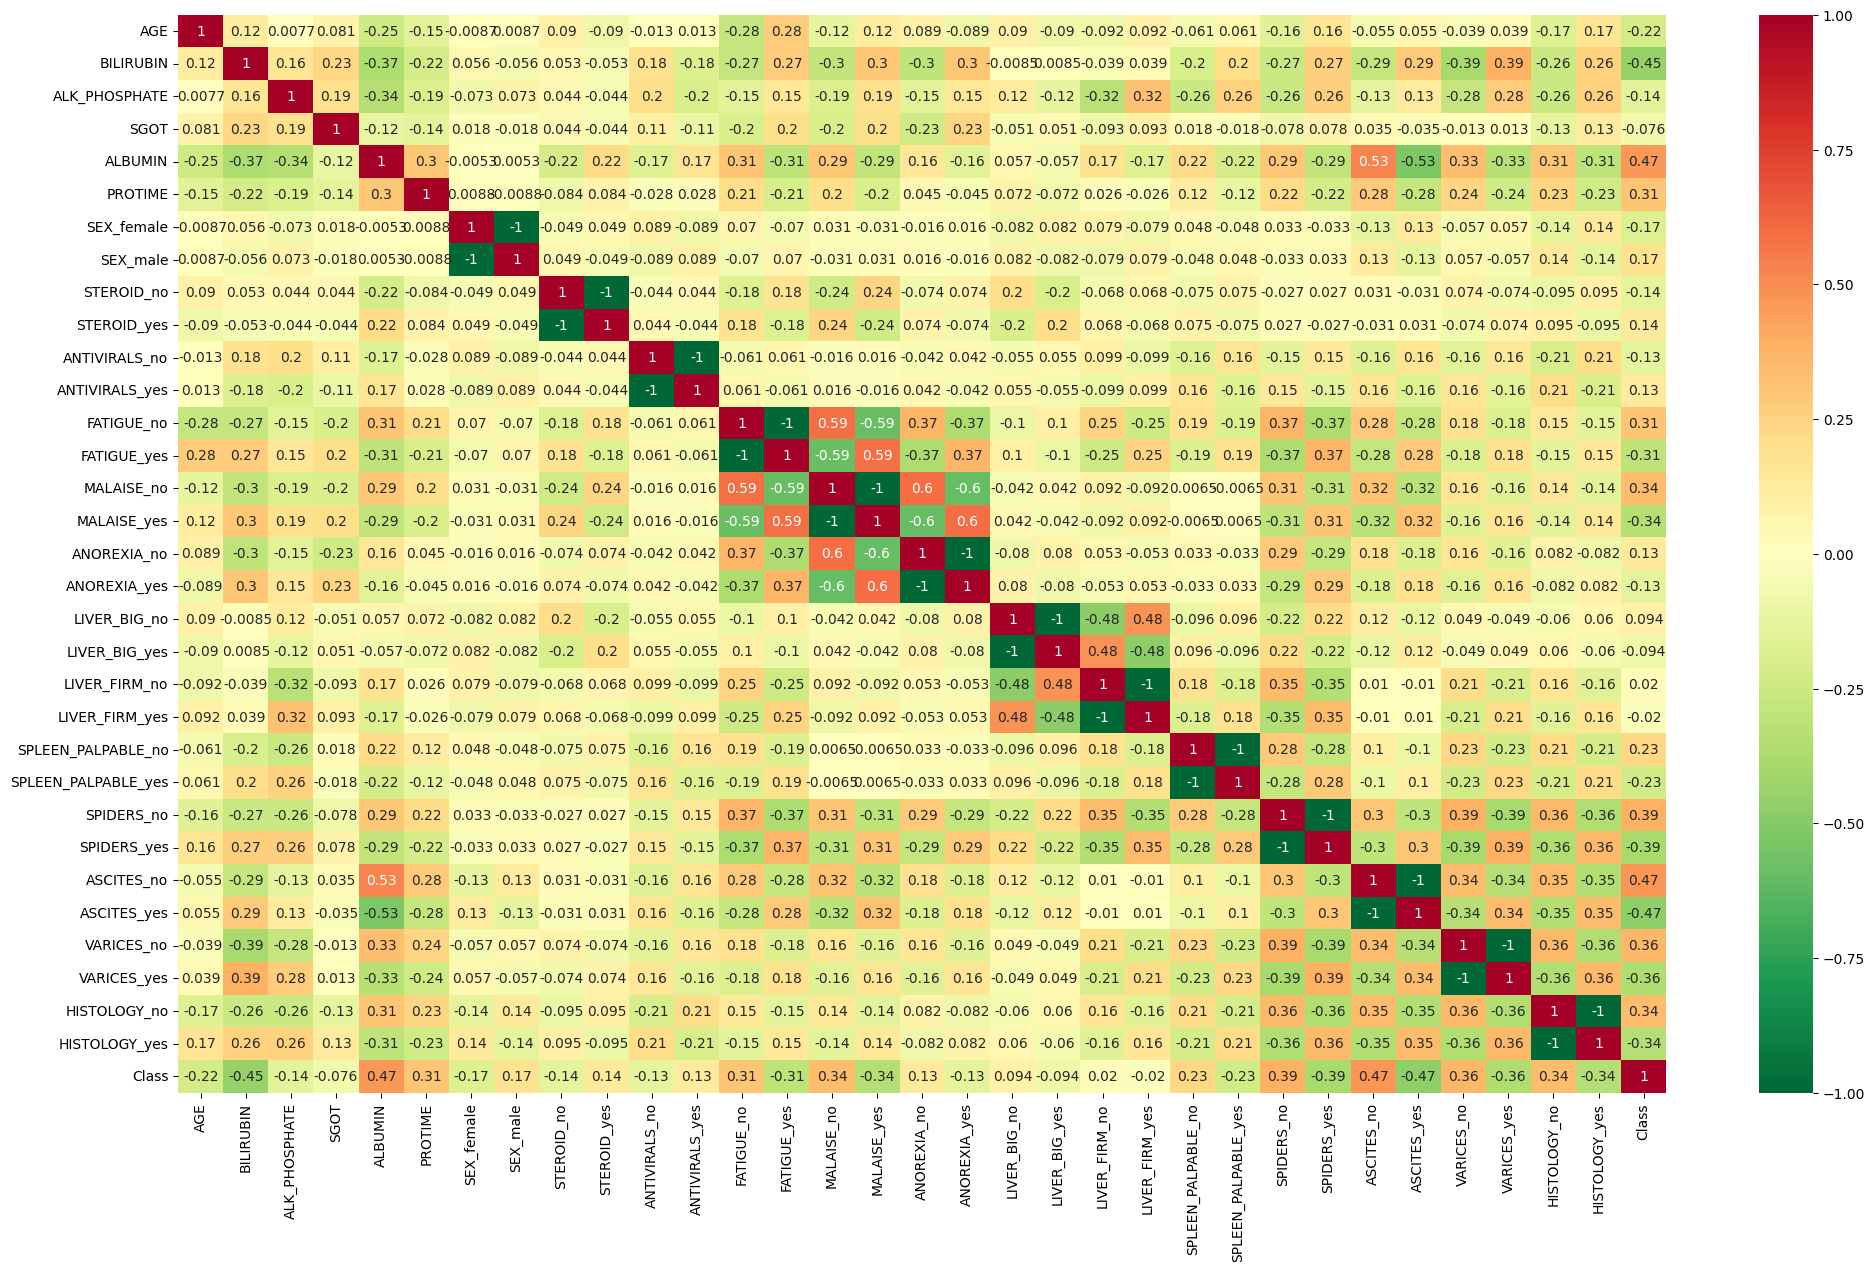

In [11]:
# Verificando a correlação:
plt.rcParams["figure.figsize"] = (24,14)

corr = df_proc.corr()
sns.heatmap(data= corr, annot= True, cmap= 'RdYlGn_r')

# O uso do heatmap em cima da matriz de correlação foi escolhido por ser um método visual que facilita enxergar variáveis relacionadas entre si e também confirmar/observar algumas características, como:
# a.) Já que usamos o One Hot Encoder, já era esperado que categorias yes/no que vieram da mesma origem tivessem correlações opostas (-1);
# b.) A simetria também se aplica entre as variáveis, caso sejam yes/no ou female/male;
# c.) Portanto, poderiamos simplesmente reduzir a matriz excluindo os dados "duplicados", já que só temos 2 opções para cada variável categórica.

<AxesSubplot: >

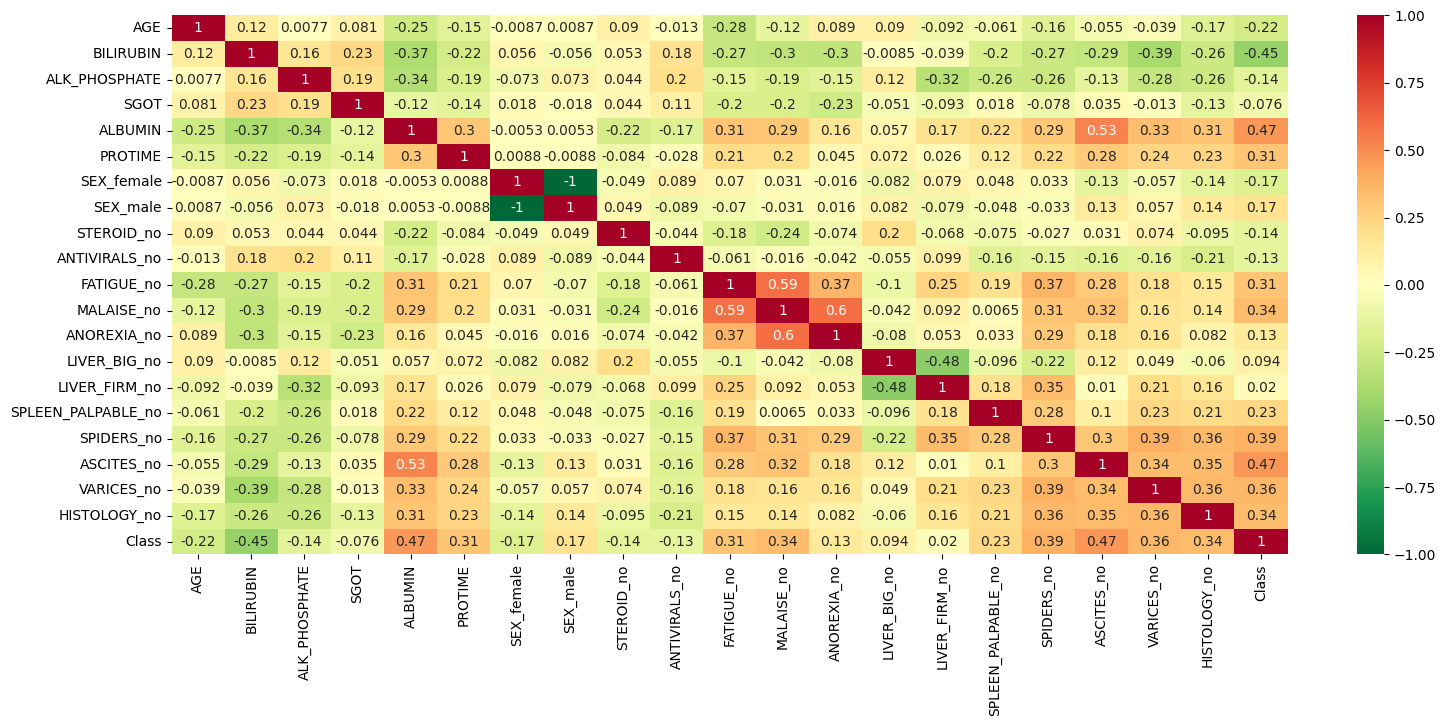

In [12]:
# Verificando a correlação com menos colunas:
plt.rcParams["figure.figsize"] = (18,7)

df_proc2 = df_proc[df_proc.columns.drop(list(df_proc.filter(regex='yes')))]
corr2 = df_proc2.corr()
sns.heatmap(data= corr2, annot= True, cmap= 'RdYlGn_r')

In [13]:
# Como o objetivo é verificar quais atributos mais influenciam na determinação da condição (especificada na Classe), vamos escolher as 10 variáveis que mais têm correlaçao com 'Class', em valores absolutos:
top10 = corr2['Class'].abs().sort_values()[-11:]
top10 = top10.index.tolist()
top10.reverse()

print(top10)

['Class', 'ASCITES_no', 'ALBUMIN', 'BILIRUBIN', 'SPIDERS_no', 'VARICES_no', 'MALAISE_no', 'HISTOLOGY_no', 'PROTIME', 'FATIGUE_no', 'SPLEEN_PALPABLE_no']




---

### Questão 04.

Com as 10 varíaveis determinadas na questão anterior, crie um novo conjunto de dados.

Lembre-se que o numpy permite indexar colunas/linhas utilizando arrays.

In [14]:
# Criação do dataframe com o subset do dataframe anterior, usando as colunas escolhidas na etapa anterior:
df_sub = df_proc2[top10]

# Verificação de algumas informações estatísticas:
df_sub.info()
df_sub.describe().loc[['count', 'mean', 'std', 'min', 'max']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Class               155 non-null    float64
 1   ASCITES_no          155 non-null    float64
 2   ALBUMIN             155 non-null    float64
 3   BILIRUBIN           155 non-null    float64
 4   SPIDERS_no          155 non-null    float64
 5   VARICES_no          155 non-null    float64
 6   MALAISE_no          155 non-null    float64
 7   HISTOLOGY_no        155 non-null    float64
 8   PROTIME             155 non-null    float64
 9   FATIGUE_no          155 non-null    float64
 10  SPLEEN_PALPABLE_no  155 non-null    float64
dtypes: float64(11)
memory usage: 13.4 KB


,Class,ASCITES_no,ALBUMIN,BILIRUBIN,SPIDERS_no,VARICES_no,MALAISE_no,HISTOLOGY_no,PROTIME,FATIGUE_no,SPLEEN_PALPABLE_no
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.793548,0.870968,0.000065,0.000516,0.670968,0.883871,0.606452,0.548387,0.000452,0.348387,0.806452
std,0.406070,0.336322,1.003376,1.003361,0.471385,0.321418,0.490120,0.499266,1.003861,0.478004,0.396360
min,0.000000,0.000000,-2.790000,-0.950000,0.000000,0.000000,0.000000,0.000000,-3.610000,0.000000,0.000000
max,1.000000,1.000000,4.200000,5.550000,1.000000,1.000000,1.000000,1.000000,2.230000,1.000000,1.000000


In [15]:
# Verificação de algumas linhas:
df_sub.head(3)

,Class,ASCITES_no,ALBUMIN,BILIRUBIN,SPIDERS_no,VARICES_no,MALAISE_no,HISTOLOGY_no,PROTIME,FATIGUE_no,SPLEEN_PALPABLE_no
0,1.0,1.0,0.30,-0.36,1.0,1.0,1.0,1.0,-0.0,1.0,1.0
1,1.0,1.0,-0.52,-0.45,1.0,1.0,1.0,1.0,-0.0,0.0,1.0
2,1.0,1.0,0.30,-0.61,1.0,1.0,1.0,1.0,-0.0,0.0,1.0




---

### Questão 05.

Reduza a dimensionalidade do conjunto de dados criado utilizando a técnica PCA (`sklearn.decomposition.PCA`). Reduza a dimensionalidade de forma que no mínimo 80% da variância dos dados seja mantida (atente-se ao atributo  `explained_variance_ratio_`). Depois exiba os eixos principais.

Variância por componente: [0.42291357 0.18362251 0.14384735 0.07405275]
Número de componentes necessários: 4


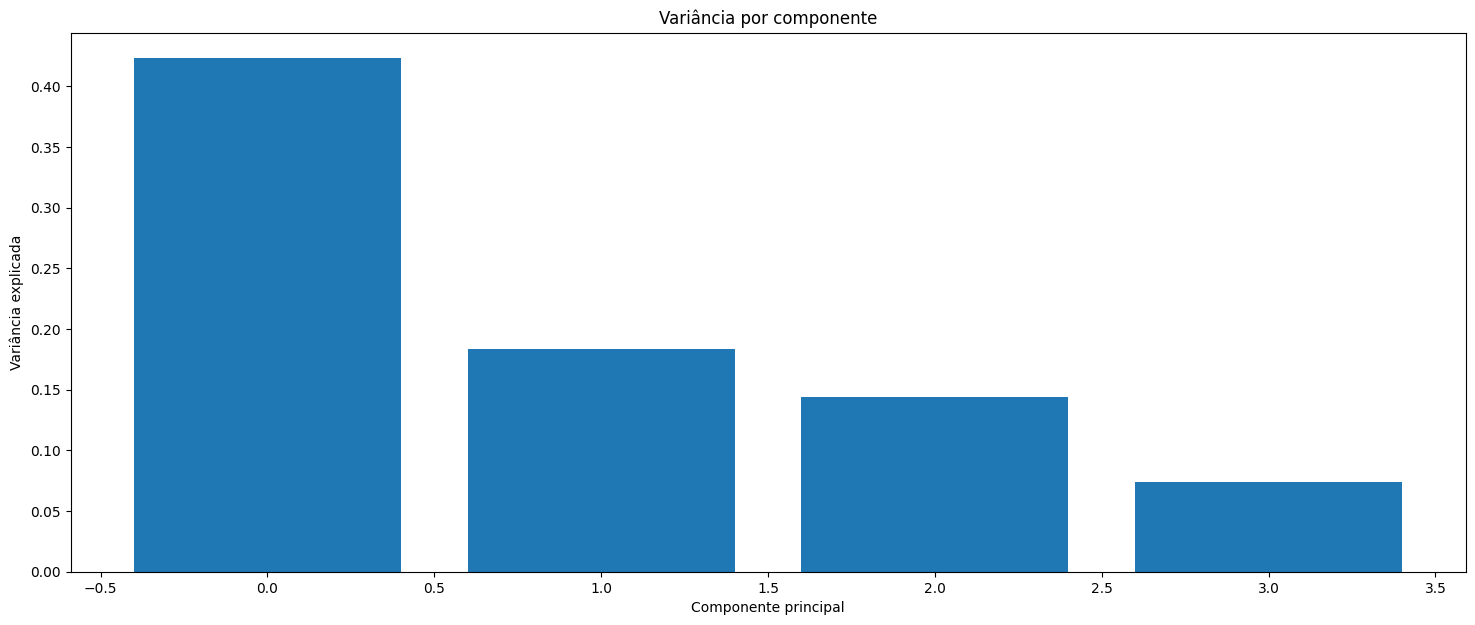

Eixos principais identificados pelo PCA:
PC0: [-0.13967935 -0.58519878  0.53772697 -0.15734899 -0.11653639 -0.16205703
 -0.16302304 -0.47385751 -0.16138556 -0.0843629 ]
PC1: [-0.00535652 -0.13407831  0.541375   -0.01852788 -0.03283075 -0.04142361
 -0.00177576  0.82691223 -0.03193002 -0.03104599]
PC2: [ 0.09643936  0.73846198  0.60608018  0.01554651 -0.01932354  0.00226873
  0.0288133  -0.27514909  0.02642304  0.01358371]
PC3: [-0.07410523  0.2474414  -0.19731235 -0.42505825 -0.04494217 -0.57886473
 -0.14726357  0.10326204 -0.58315725 -0.06440748]


In [30]:
# Criação de um subset apenas com os dados (sem a Classe):
df_sub_data = df_sub.drop('Class', axis= 1)

# Inicialização do objeto PCA para manter pelo menos 80% da variância
pca = PCA(n_components = 0.8)

# Aplicação do PCA aos dados e retorno dos dados reduzidos
df_sub_data_pca = pca.fit_transform(df_sub_data)

# Cálculo da variância explicada de cada componente principal
var_exp = pca.explained_variance_ratio_
print("Variância por componente:", var_exp)

# Cálculo da variância cumulativa das componentes principais
cum_var_exp = np.cumsum(var_exp)
print("Número de componentes necessários:", len(cum_var_exp))

# Gráfico de barras para exibir a variância explicada por cada componente principal
plt.bar(range(len(var_exp)), var_exp)
plt.xlabel('Componente principal')
plt.ylabel('Variância explicada')
plt.title('Variância por componente')
plt.show()

# Exibe os eixos principais (componentes principais) identificados pelo PCA
print('Eixos principais identificados pelo PCA:')
for i in range(len(cum_var_exp)):
    print(f'PC{i}: {pca.components_[i]}')



---

### Questão 06.

Teste um modelo de classificação (através da função `model_tester`) nos conjuntos criados nas questões 4 e 5. Houve redução expressiva da acurácia? Comente o resultado obtido.

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# - Descrição:  Função que testa um modelo de classificação (MLP). 
# - Parâmetros: Variáveis de entrada (inputs) e a variável alvo (target).
# - Retorna:    Não retorna nenhum valor. Mas imprime a acurácia do modelo.
def model_tester(inputs, target):
  clf = MLPClassifier(hidden_layer_sizes=(5,), random_state=0, max_iter=10000)
  scores = cross_val_score(clf, inputs, target, cv=10)
  print("Score do classificador: %.2f" % (scores.mean()*100))

In [33]:
model_tester(df_sub.drop('Class', axis= 1), df_sub['Class'])

model_tester(df_sub_data_pca, df_sub['Class'])

Score do classificador: 87.08
Score do classificador: 85.83


Como observamos nos resultados acima, a acurácia após utilização do PCA para reduzir de 10 para 4 dimensões foi minimamente afetada, com diminuição de 1.25%.
Vemos, portanto, que o uso da técnica de análise de componentes principais pode ser muito eficaz e, além disso, que é possível criar modelos com retenção de muita informação mesmo quando o conjunto é massivamente reduzido.